1. Read the data
2. Perform prelim analysis of the data and drop obvious features
3. Visualise the data
4. Check for Multiple Linear Regression Assumptions ->Normality, Linear Correlation, Multicollinearity, Autocorrelation, Sample Size
5. Drop irrelevant features
6. Create/Modify more features
7. Create dummy variables
8. Train/Test split
9. Fit and score the model
10. Present results


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()

In [111]:
bikes= pd.read_csv('bike.csv')
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [112]:
bikes.describe()

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [113]:
bikes.shape

(17379, 17)

In [114]:
bikes.info()
#bikes_prep.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [115]:
#demand= casual+registered
#index, date not needed

bikes_prep= bikes.copy()
bikes_prep= bikes_prep.drop(["casual", "index", "registered", "date"], axis=1) # axis =1 for columns, default is dropping rows


In [116]:
bikes_prep.shape

(17379, 13)

<Figure size 2160x1440 with 0 Axes>

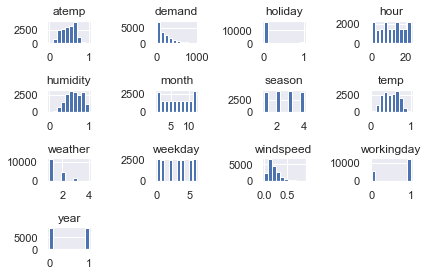

In [117]:
plt.figure(figsize=(30,20))
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

In [118]:
#predicted variable demand not normally distributed ->looks like a log-normal distribution

In [119]:
#categorical variables- weather, year, working day,weekday, season, holiday, hour, month
#continuous variables- atemp,temp, humidity, windspeed
#predicted variable- demand

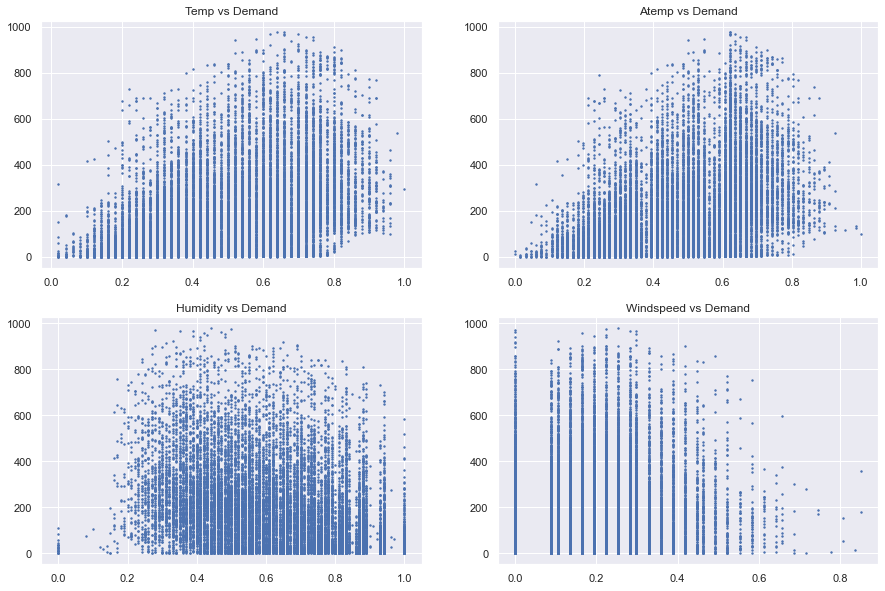

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Temp vs Demand")
plt.scatter(bikes_prep["temp"], bikes_prep["demand"], s=2)

plt.subplot(2,2,2)
plt.title("Atemp vs Demand")
plt.scatter(bikes_prep["atemp"], bikes_prep["demand"], s=2)

plt.subplot(2,2,3)
plt.title("Humidity vs Demand")
plt.scatter(bikes_prep["humidity"], bikes_prep["demand"], s=2)

plt.subplot(2,2,4)
plt.title("Windspeed vs Demand")
plt.scatter(bikes_prep["windspeed"], bikes_prep["demand"], s=2)

plt.show()


In [121]:
#temp and atemp show almost similar trends (+ve)
#windspeed trend is stable till a certain limit but then shows -ve trend
#Humidity almost constant correlation

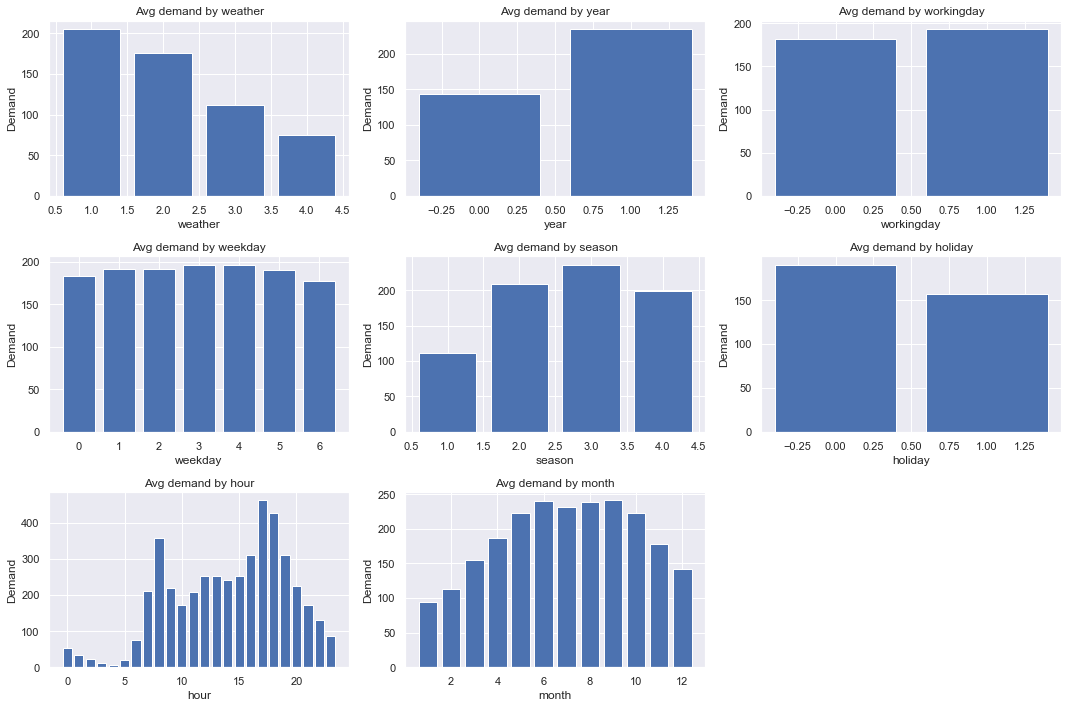

In [122]:
#average demand per season/ days/ hour etc
i=1
cols=["weather", "year", "workingday", "weekday", "season", "holiday", "hour", "month"]
plt.figure(figsize=(15,10))

for col in cols:
    cat_list= bikes_prep[col].unique()
    cat_avg= bikes_prep.groupby(col).mean()["demand"]
    plt.subplot(3,3,i)
    plt.title("Avg demand by " + str(col))
    plt.xlabel(str(col))
    plt.ylabel("Demand")
    plt.bar(cat_list, cat_avg)
    plt.tight_layout()
    i+=1

In [123]:
#demand doesn't depend on weekday
#year, don't know much trend for next few years, limited years of data
#demand doesn't depend on workingday

Conclusions from Data Visualisation

1. Demand is not normally distributed
2. Temp and demand have a direct correlation
3. Plots for temp and atemp appear identical
4. Humidity and Windspeed affect demand but need to look further into it
5. Avg demands vary acc to Season, Month, Holiday, Hour, Weather


In [124]:
bikes_prep= bikes_prep.drop(['year', 'workingday', 'weekday'], axis=1)

In [125]:
bikes_prep["demand"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [126]:
bikes_prep["demand"].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1da2904f0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1da29e72fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da2904fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x1da29dd6e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da29dd6460>],
 'means': []}

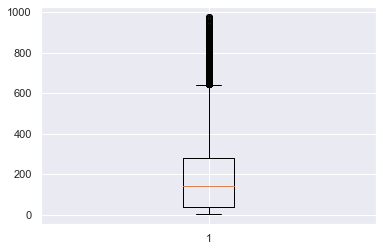

In [127]:
plt.boxplot(bikes_prep["demand"])

In [128]:
correlation= bikes_prep[["atemp","temp", "humidity", "windspeed", "demand"]].corr()

In [129]:
print(correlation)

              atemp      temp  humidity  windspeed    demand
atemp      1.000000  0.987672 -0.051918  -0.062336  0.400929
temp       0.987672  1.000000 -0.069881  -0.023125  0.404772
humidity  -0.051918 -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.062336 -0.023125 -0.290105   1.000000  0.093234
demand     0.400929  0.404772 -0.322911   0.093234  1.000000


In [130]:
#due to high correlation btw temp and atemp-> drop atemp
#barely any correlation between windspeed and demand-> drop windspeed

In [131]:
bikes_prep= bikes_prep.drop(['atemp', 'windspeed'], axis=1)

In [132]:
#checking auto correlation in demand using acorr

(array([-24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24]),
 array([0.91173   , 0.86098665, 0.77148455, 0.7000394 , 0.64825755,
        0.5964051 , 0.53881854, 0.4916388 , 0.47726512, 0.4932858 ,
        0.49140626, 0.46724424, 0.45474693, 0.47049534, 0.4962279 ,
        0.49404034, 0.46795917, 0.4773202 , 0.5267575 , 0.5914572 ,
        0.6520155 , 0.7151952 , 0.8059098 , 0.92530924, 1.        ,
        0.92530924, 0.8059098 , 0.7151952 , 0.6520155 , 0.5914572 ,
        0.5267575 , 0.4773202 , 0.46795917, 0.49404034, 0.4962279 ,
        0.47049534, 0.45474693, 0.46724424, 0.49140626, 0.4932858 ,
        0.47726512, 0.4916388 , 0.53881854, 0.5964051 , 0.64825755,
        0.7000394 , 0.77148455, 0.86098665, 0.91173   ], dtype=float32),
 <matplotlib.lines.Line2D at 0x1da27

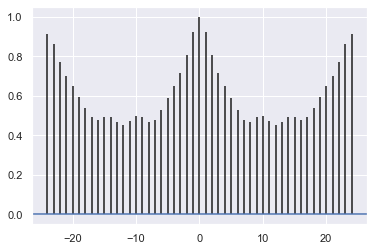

In [133]:
df1= pd.to_numeric(bikes_prep["demand"], downcast= 'float')
plt.acorr(df1, maxlags=24)
#plt.acorr(df1, maxlags=12)
#plt.acorr(df1, maxlags=5)

In [134]:
#high autocorrelation in demand ->can't drop this column, else you could drop too

In [135]:
bikes_prep['demand']= np.log(bikes_prep['demand'])

(array([ 158.,  432.,  925., 1033., 1281., 1598., 2561., 4230., 3780.,
        1381.]),
 array([0.        , 0.68844867, 1.37689733, 2.065346  , 2.75379466,
        3.44224333, 4.13069199, 4.81914066, 5.50758932, 6.19603799,
        6.88448665]),
 <a list of 10 Patch objects>)

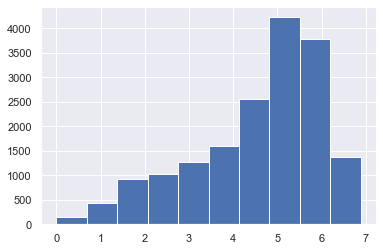

In [136]:
plt.hist(bikes_prep['demand']) # converted to normal distribution

In [137]:
t_1= bikes_prep['demand'].shift(+1).to_frame()
t_1.columns= ['t_1']
t_2= bikes_prep['demand'].shift(+2).to_frame()
t_2.columns= ['t_2']
t_3= bikes_prep['demand'].shift(+3).to_frame()
t_3.columns= ['t_3']

In [138]:
bikes_prep_lag= pd.concat([bikes_prep, t_1,t_2, t_3], axis=1)

In [139]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t_1,t_2,t_3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [140]:
bikes_prep_lag.dropna(inplace=True)

In [141]:
bikes_prep_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t_1,t_2,t_3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [146]:
cols=["weather", "season", "hour", "month"]
for col in cols:
    bikes_prep_lag[col]= bikes_prep_lag[col].astype('category') # this step needed else the data type of these columns is int, get_dummies won't work
bikes_prep_lag= pd.get_dummies(bikes_prep_lag, drop_first=True)
#dropping first to remove the dummy variable trap

In [148]:
bikes_prep_lag.head()

,holiday,temp,humidity,demand,t_1,t_2,t_3,season_2,season_3,season_4,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_2,weather_3,weather_4
3,0,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
#time series data, the time dependant data, need to a complete subset and not random rows here and there
# can take from starting, end or middle

In [150]:
Y= bikes_prep_lag[['demand']]
X= bikes_prep_lag.drop(['demand'], axis=1)

In [152]:
tr_size= int(0.7* len(X))

In [155]:
x_train= X.values[0:tr_size]
x_test=X.values[tr_size:]
y_train= Y.values[0:tr_size]
y_test= Y.values[tr_size:]

In [158]:
from sklearn.linear_model import LinearRegression

In [160]:
lr=LinearRegression()
lr.fit(x_train,y_train)

r2_train= lr.score(x_train, y_train)
r2_test= lr.score(x_test, y_test)

y_pred= lr.predict(x_test)

In [162]:
from sklearn.metrics import mean_squared_error
rmse= math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.3809880049817057


In [163]:
y_test_e=[]
y_pred_e=[]

for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_pred_e.append(math.exp(y_pred[i]))

In [164]:
print(y_pred_e)

[24.779522138517134, 17.549148223487553, 24.98951792090536, 22.513625164312494, 66.54778484724926, 167.72965944768328, 179.3346527484909, 285.90480302108057, 591.6350382607018, 630.0470291466698, 485.241501051278, 393.33886156915975, 498.71701489836636, 617.6622675739367, 675.1941286153751, 459.6858500517041, 393.8673955456809, 351.018359076724, 228.71644352631756, 87.72327016048452, 31.600829174208073, 55.78249122666603, 39.633865064249434, 30.796001498759775, 21.965041677314957, 9.499913595652869, 14.40352500268874, 30.57792794332607, 66.16070039173832, 187.26040692379058, 182.20312629106496, 251.05200563625672, 480.63404878691546, 556.9234026911022, 447.4596361045395, 421.321894888579, 423.1830616666725, 505.47437647227974, 668.6114582651142, 366.79724238236275, 291.45950152278823, 322.0658216655164, 266.7744036303033, 191.40381149841508, 101.00075869014981, 49.22265697858817, 27.26014247564586, 10.545161664460586, 5.692015027437403, 3.153719745225248, 20.616282153555805, 154.793735